In [4]:
import numpy as np
import matplotlib.pyplot as plt


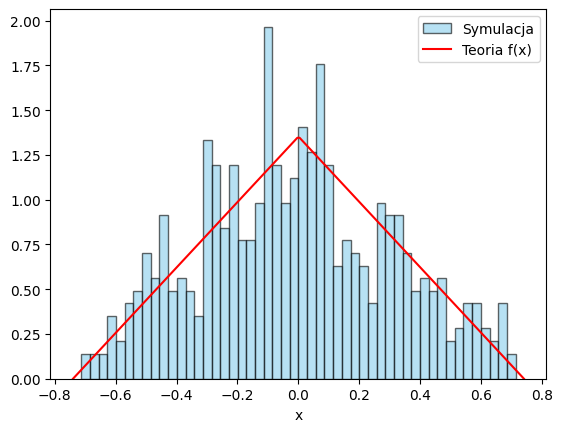

In [53]:
n = 500
U = np.random.rand(n)

X = np.where(U < 0.5,
             -1 + np.sqrt(2 * U),
             1 - np.sqrt(2 * (1 - U)))

desired_var = 0.1 # wariancja
current_var = np.var(X)
scale_factor = np.sqrt(desired_var / current_var)
#scale_factor = 1
noise = X * scale_factor
#noise = X
plt.hist(noise, bins=50, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Symulacja')

x_vals = np.linspace(-1, 1, 200) * scale_factor
f = np.where(x_vals < 0, x_vals / scale_factor + 1, 1 - x_vals / scale_factor) / scale_factor
plt.plot(x_vals, f, 'r-', label='Teoria f(x)')

plt.xlabel('x')
plt.legend()
plt.show()


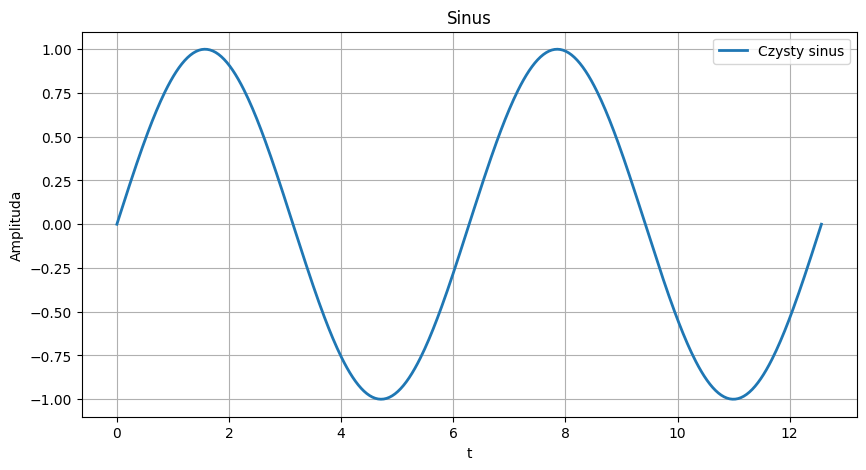

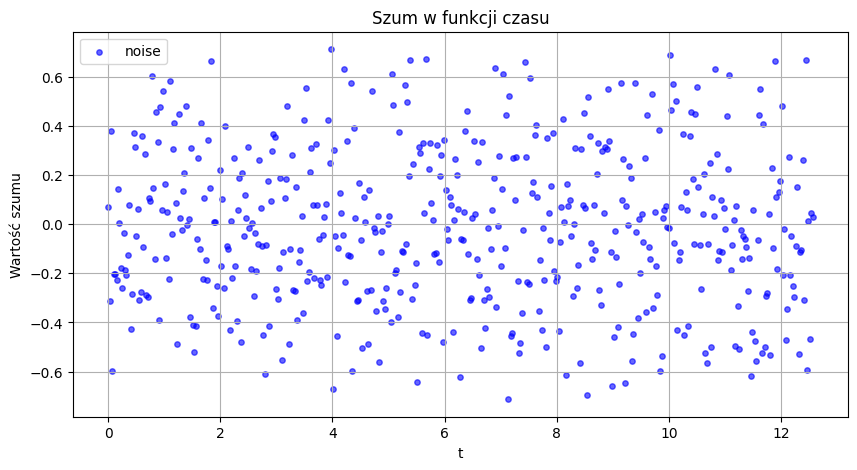

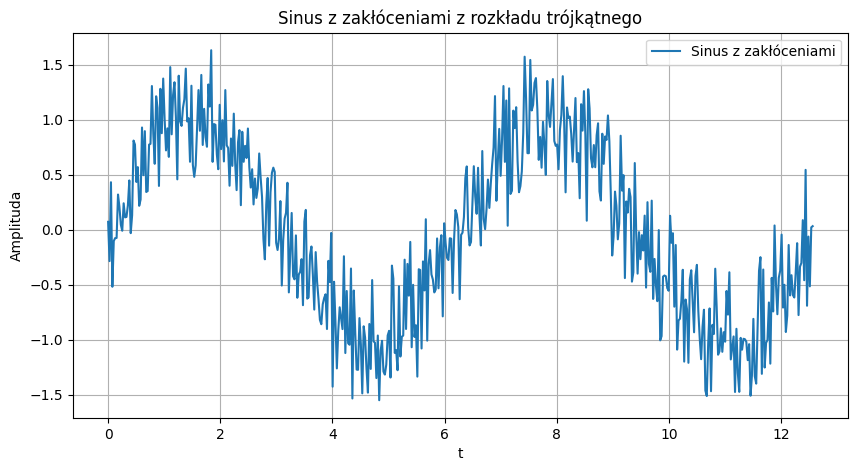

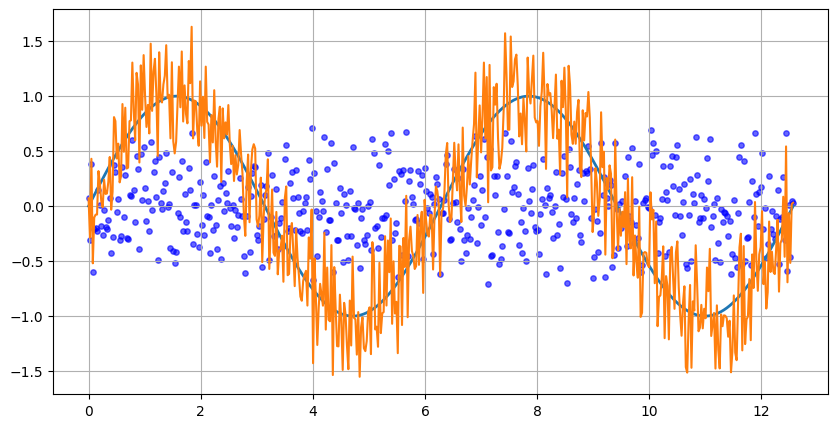

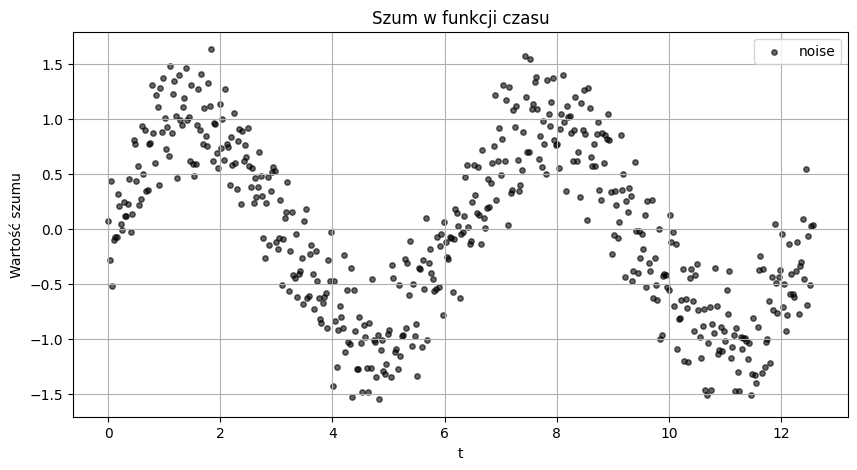

In [54]:

# --- Parametry ---
A = 1        
f = 1        
t = np.linspace(0, 4 * np.pi, n) 

y_clean = A * np.sin(t) 
y_noisy = y_clean + noise

# --- Rysowanie ---
plt.figure(figsize=(10, 5))
plt.plot(t, y_clean, label='Czysty sinus', linewidth=2)
plt.title('Sinus')
plt.xlabel('t')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 5))
plt.scatter(t, noise, color='blue', s=15, alpha=0.6, label='noise')
plt.title('Szum w funkcji czasu')
plt.xlabel('t')
plt.ylabel('Wartość szumu')
plt.legend()
plt.grid(True)
plt.show()



plt.figure(figsize=(10, 5))
plt.plot(t, y_noisy, label='Sinus z zakłóceniami')
plt.title('Sinus z zakłóceniami z rozkładu trójkątnego')
plt.xlabel('t')
plt.ylabel('Amplituda')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(t, y_clean, label='Czysty sinus', linewidth=2)
plt.scatter(t, noise, color='blue', s=15, alpha=0.6, label='noise')
plt.plot(t, y_noisy, label='Sinus z zakłóceniami')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 5))
plt.scatter(t, y_noisy, color='black', s=15, alpha=0.6, label='noise')
plt.title('Szum w funkcji czasu')
plt.xlabel('t')
plt.ylabel('Wartość szumu')
plt.legend()
plt.grid(True)
plt.show()

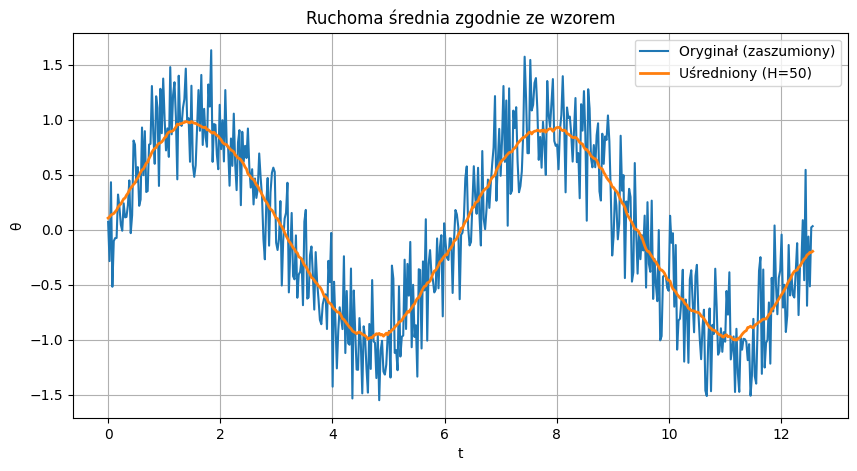

In [ ]:
def moving_average_fast(theta, H):
    return np.convolve(theta, np.ones(H)/H, mode='same')


# Uśrednianie z oknem H=20
H = 50
theta_hat = moving_average_fast(y_noisy, H)

# Wykres
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(t, y_noisy, label='Oryginał (zaszumiony)')
plt.plot(t, theta_hat, label=f'Uśredniony (H={H})', linewidth=2)
plt.xlabel('t')
plt.ylabel('θ')
plt.legend()
plt.grid(True)
plt.show()

